<a href="https://colab.research.google.com/github/iamsommyajain/PotatoDiseasePrediction/blob/main/Potato_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download faysalmiah1721758/potato-dataset

Dataset URL: https://www.kaggle.com/datasets/faysalmiah1721758/potato-dataset
License(s): CC0-1.0
potato-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras
import cv2
import seaborn as sns
import random

In [ ]:
DATADIR='/content/PotatoDisease'
CATEGORIES = ['Potato___Early_blight','Potato___Late_blight','Potato___healthy']

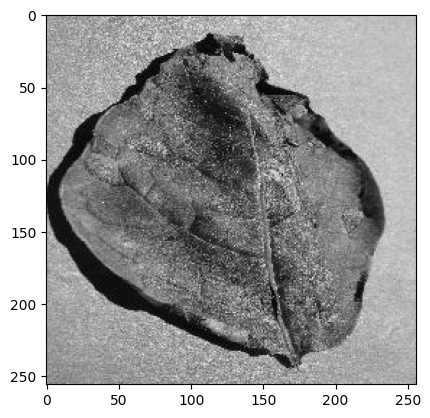

In [ ]:
for category in CATEGORIES :
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap = 'gray')
    plt.show()
    break
  break

array([[186, 149, 141, ..., 196, 192, 183],
       [157, 163, 165, ..., 197, 193, 185],
       [170, 154, 176, ..., 196, 192, 185],
       ...,
       [159, 159, 136, ..., 171, 176, 181],
       [127, 147, 147, ..., 165, 158, 155],
       [152, 154, 141, ..., 173, 165, 157]], dtype=uint8)
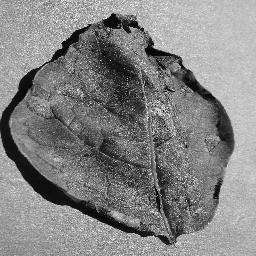

In [ ]:
img_array

In [ ]:
img_array.shape

(256, 256)

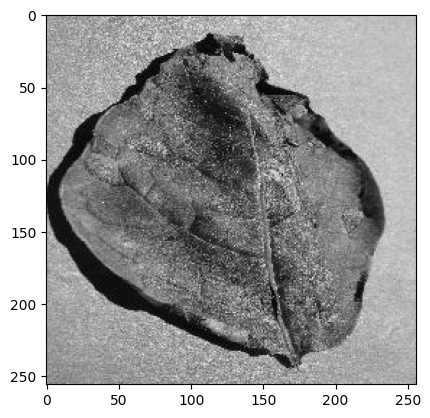

In [ ]:
IMG_SIZE = 256
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
  for category in CATEGORIES :
    path = os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

create_training_data()

In [ ]:
len(training_data)

2152

In [ ]:
random.shuffle(training_data)

In [ ]:
X = []
y =[]

for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [ ]:
type(X), type (y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X=X/255

Building CNN Model

In [ ]:
model = keras.Sequential([
    #CONVOLUTIONAL LAYER 1
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=X.shape[1:]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    #CONVOLUTIONAL LAYER 1
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    #FLATTENING LAYER
    keras.layers.Flatten(),

    #HIDDEN LAYER
    keras.layers.Dense(64, activation='relu'),

    #OUTPUT LAYER
    keras.layers.Dense(3, activation='softmax')
]
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X,y,epochs=10,batch_size=32, validation_split=0.1)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.6145 - loss: 1.5457 - val_accuracy: 0.8056 - val_loss: 0.5463
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8540 - loss: 0.4387 - val_accuracy: 0.8426 - val_loss: 0.4350
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.8950 - loss: 0.2827 - val_accuracy: 0.9074 - val_loss: 0.2540
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9465 - loss: 0.1526 - val_accuracy: 0.8935 - val_loss: 0.2930
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9705 - loss: 0.0869 - val_accuracy: 0.8704 - val_loss: 0.2949
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9884 - loss: 0.0405 - val_accuracy: 0.8843 - val_loss: 0.3763
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9985 - loss: 0.0140 - val_accuracy: 0.8981 - val_loss: 0.3696
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9983 - loss: 0.0118 - val_accuracy: 0.8889 -

In [ ]:
model.save('potato_disease_prediction.h5')